In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from random import seed
from scipy import stats
import seaborn as sns
import pingouin as pg
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
import statsmodels.api as sm
from statsmodels.formula.api import ols


# 1. Load data from "3. BrainAge"

In [3]:
# load data from pickle and convert to dataframe
brain_test = pd.read_pickle("3_brain_test.pkl")
brain_train = pd.read_pickle("3_brain_train.pkl")
main_test = pd.read_pickle("3_main_test.pkl")
main_train = pd.read_pickle("3_main_train.pkl")
brain_test = pd.DataFrame(brain_test)
brain_train = pd.DataFrame(brain_train)
main_test = pd.DataFrame(main_test)
main_train = pd.DataFrame(main_train)

# 2. Recode variables

In [4]:
#main_test = main_test[main_test["Excluded"]==0]

main_test['Imaging site'] = main_test['Imaging site'].map({'Cheadle': 1, 'Reading': 2,'Newcastle': 3, 'Bristol': 4})
main_test["Smoking"] = main_test["Smoking"].map({"No":0, "Only occasionally":1, "Yes, on most or all days":2})
main_test["Gender"] = main_test["Gender"].map({"Female":0, "Male":1})
#main_test = main_test.drop(main_test[main_test["Smoking"]=="Prefer not to answer"])
#print(main_test["Smoking"].value_counts())


#main_test["PA Moderate Difference"] = main_test["Moderate PA"] - main_test["SR Moderate PA"]
#main_test["PA Vigorous Difference"] = main_test["Vigorous PA"] - main_test["SR Vigorous PA"]
#main_test["PA Light Difference"] = main_test["Light PA"] - main_test["SR Walking PA"]

#del main_test["BA Desikan Delta Corr"]

median_age = np.median(main_test["Age"])
main_test_young = main_test[main_test["Age"]<median_age]
main_test_old = main_test[main_test["Age"]>=median_age]

main_test_male = main_test[main_test["Gender"]==1]
main_test_female = main_test[main_test["Gender"]==0]

main_test_old_male = main_test_male[main_test_male["Age"]>=median_age]
main_test_old_female = main_test_female[main_test_female["Age"]>=median_age]
main_test_young_male = main_test_male[main_test_male["Age"]<median_age]
main_test_young_female = main_test_female[main_test_female["Age"]<median_age]

In [5]:
print(main_test["ECG max workload"].isna().sum())

print(main_test.shape)

6937
(8357, 23)


# 3. Show the data

In [6]:
main_test.head()

,Age,Gender,Total PA,Vigorous PA,Moderate PA,Light PA,BMI,ECG max workload,ECG max heart rate,SR Walking PA,...,Hand grip R,Excluded,Imaging site,Smoking,Townsend deprivation,Mental disorder,BA A2009 Delta Corr,BA ASEG Delta Corr,BA Desikan Delta Corr,BA Delta Corr
2,73.0,0,2550.2400,10.0800,352.8000,2187.3600,26.9,NaN,NaN,1188.0,...,26.0,0,1,0.0,-3.469800,0,8.601317,11.322269,9.848702,5.692717
6,67.0,1,1302.9120,0.0000,100.2240,1202.6880,34.2,NaN,NaN,330.0,...,36.0,1,1,0.0,-2.203830,0,-16.241672,2.767434,-14.563010,-7.268007
12,56.0,1,1601.3088,18.9504,227.4048,1354.9536,28.4,120.0,117.0,396.0,...,39.0,1,1,0.0,0.642148,0,3.824066,-1.880907,3.801415,-1.735580
21,56.0,0,2465.2224,29.1168,427.0464,2009.0592,33.6,NaN,NaN,2970.0,...,18.0,1,1,0.0,-5.554810,0,-3.948342,-8.860875,14.603062,-5.116799
25,70.0,0,2746.1376,10.0224,210.4704,2525.6448,22.1,NaN,NaN,2772.0,...,20.0,0,2,0.0,-0.812078,0,-10.480420,-14.734094,-1.414644,-14.503003


# 4. Basic distributions

- Comparing training and test set based on
    - Gender
    - Age
    - Self-reported PA
    - ??
- Comparing excluded and included subjects based on
    - Gender
    - Age
    - PA
    - Brain Age Delta

## 4.1. Age and BrainAge Distributions

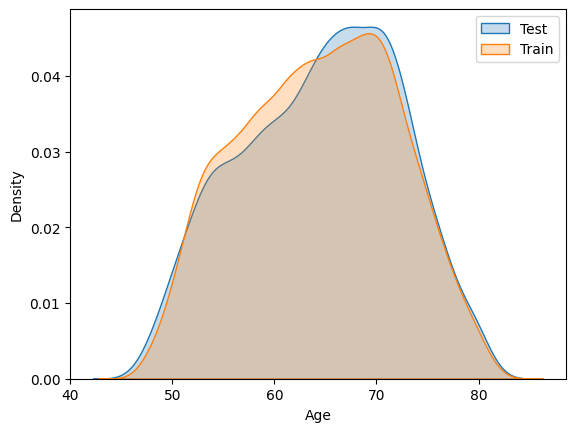

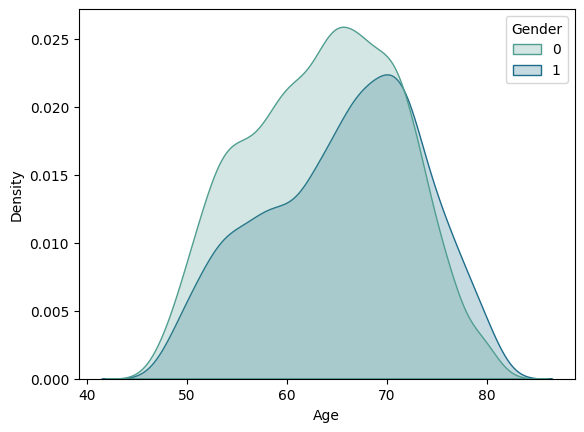

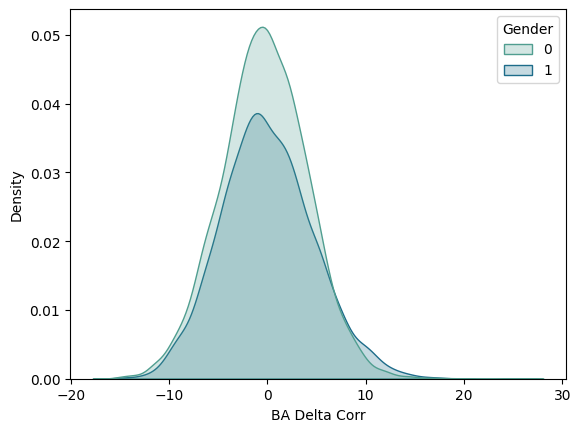

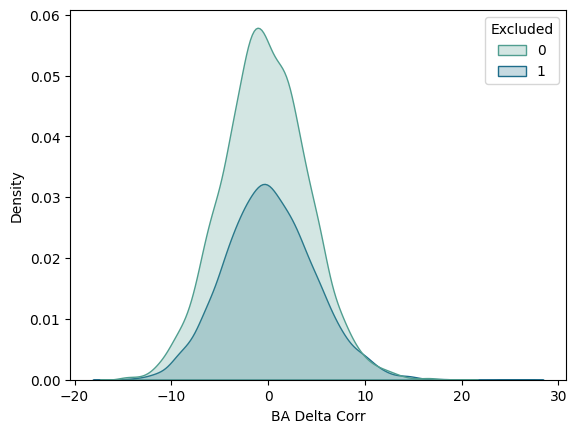

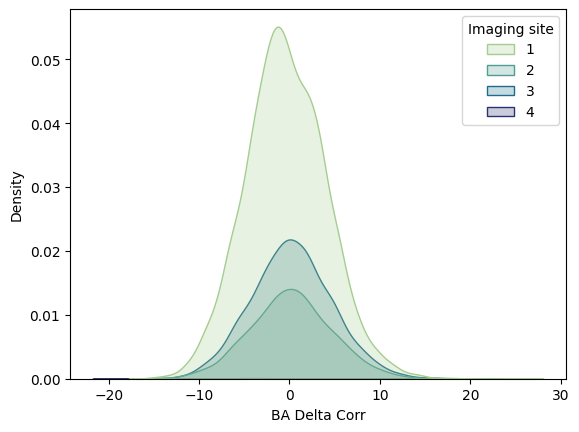

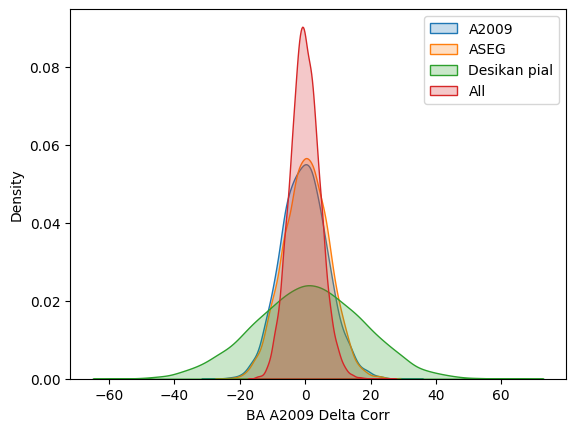

In [7]:
plt.figure()
sns.kdeplot(data = main_test, x= 'Age', fill=True, label = "Test")
sns.kdeplot(data = main_train, x= 'Age', fill=True, label = "Train")
plt.legend()
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'Age', hue = 'Gender', fill=True, palette = "crest")
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'BA Delta Corr', hue = 'Gender', fill=True, palette = "crest")
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'BA Delta Corr', hue = 'Excluded', fill=True, palette = "crest")
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'BA Delta Corr', hue = 'Imaging site', fill=True, palette = "crest")
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'BA A2009 Delta Corr', fill=True, label="A2009")
sns.kdeplot(data = main_test, x= 'BA ASEG Delta Corr', fill=True, label="ASEG")
sns.kdeplot(data = main_test, x= 'BA Desikan Delta Corr', fill=True, label="Desikan pial")
sns.kdeplot(data = main_test, x= 'BA Delta Corr', fill=True, label="All")
plt.legend()
plt.show()

## 4.2. Physical activity distributions

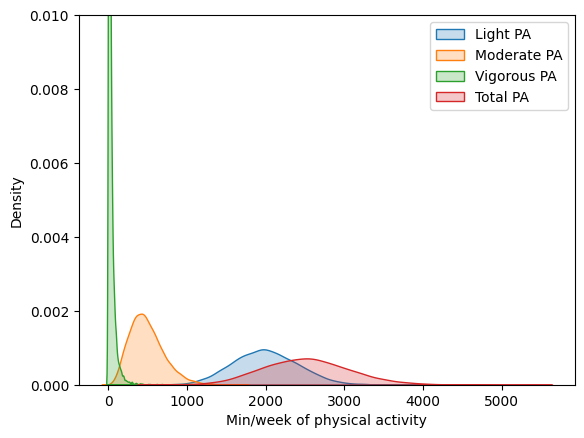

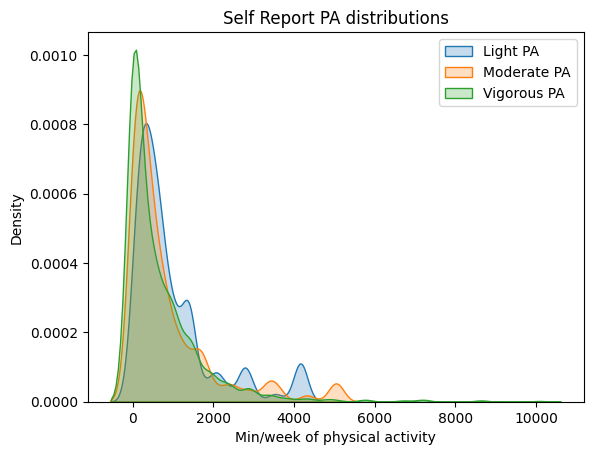

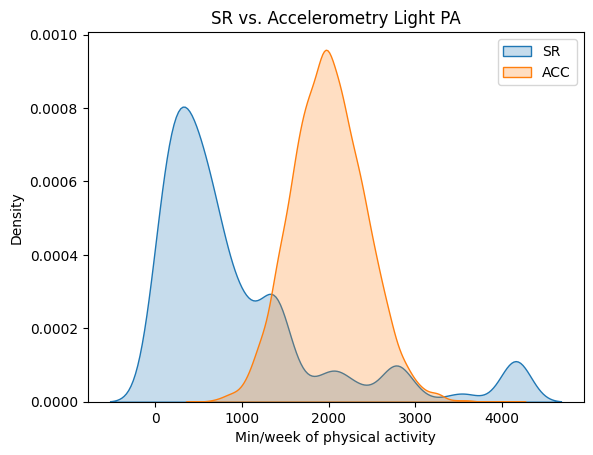

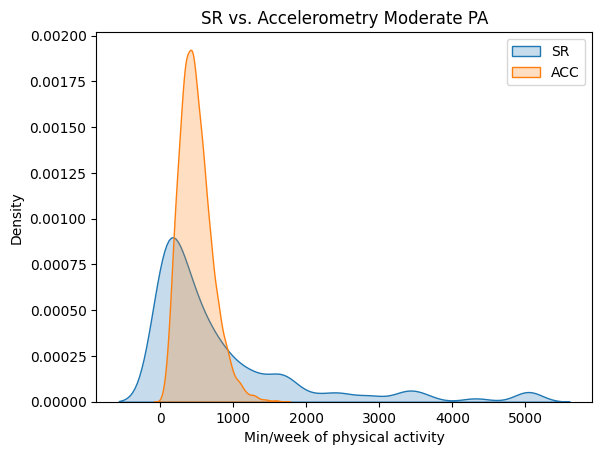

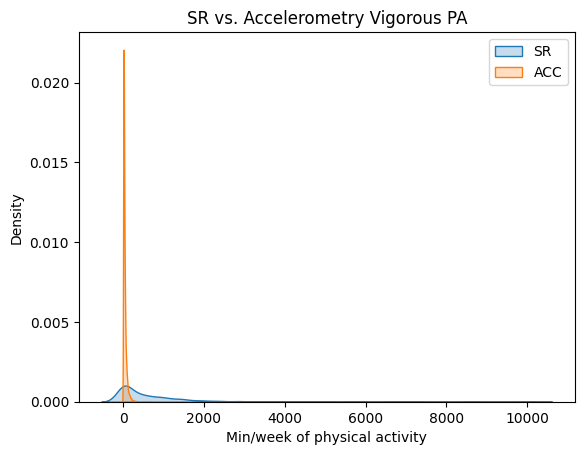

In [8]:
plt.figure()
sns.kdeplot(data = main_test, x= 'Light PA', fill=True, label = "Light PA")
sns.kdeplot(data = main_test, x= 'Moderate PA', fill=True, label = "Moderate PA")
sns.kdeplot(data = main_test, x= 'Vigorous PA', fill=True, label = "Vigorous PA")
sns.kdeplot(data = main_test, x= 'Total PA', fill=True, label = "Total PA")
plt.xlabel("Min/week of physical activity")
plt.legend()
plt.ylim(0,0.01)
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'SR Walking PA', fill=True, label = "Light PA")
sns.kdeplot(data = main_test, x= 'SR Moderate PA', fill=True, label = "Moderate PA")
sns.kdeplot(data = main_test, x= 'SR Vigorous PA', fill=True, label = "Vigorous PA")
plt.xlabel("Min/week of physical activity")
plt.title("Self Report PA distributions")
plt.legend()
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'SR Walking PA', fill=True, label = "SR")
sns.kdeplot(data = main_test, x= 'Light PA', fill=True, label = "ACC")
plt.xlabel("Min/week of physical activity")
plt.title("SR vs. Accelerometry Light PA")
plt.legend()
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'SR Moderate PA', fill=True, label = "SR")
sns.kdeplot(data = main_test, x= 'Moderate PA', fill=True, label = "ACC")
plt.xlabel("Min/week of physical activity")
plt.title("SR vs. Accelerometry Moderate PA")
plt.legend()
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'SR Vigorous PA', fill=True, label = "SR")
sns.kdeplot(data = main_test, x= 'Vigorous PA', fill=True, label = "ACC")
plt.xlabel("Min/week of physical activity")
plt.title("SR vs. Accelerometry Vigorous PA")
plt.legend()
plt.show()


## 4.3. Scatterplots of PA with BrainAge Delta

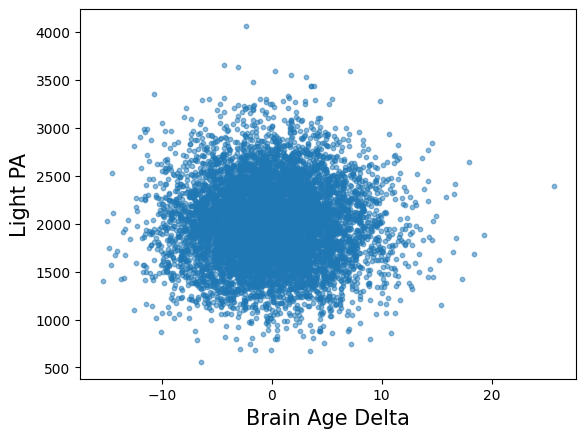

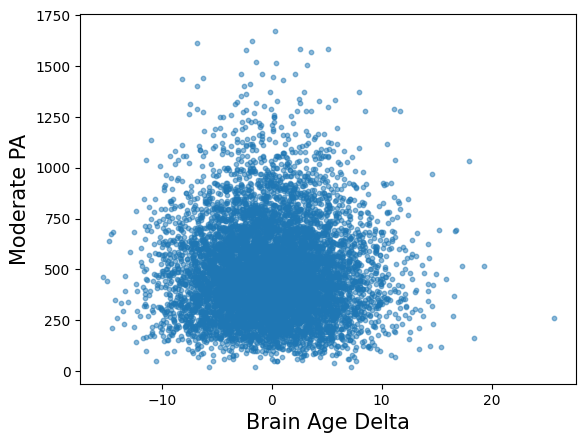

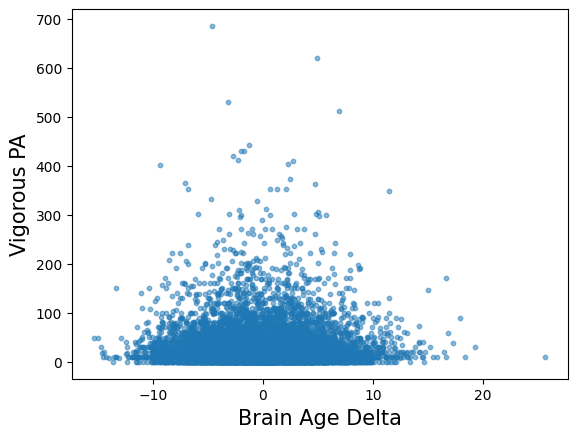

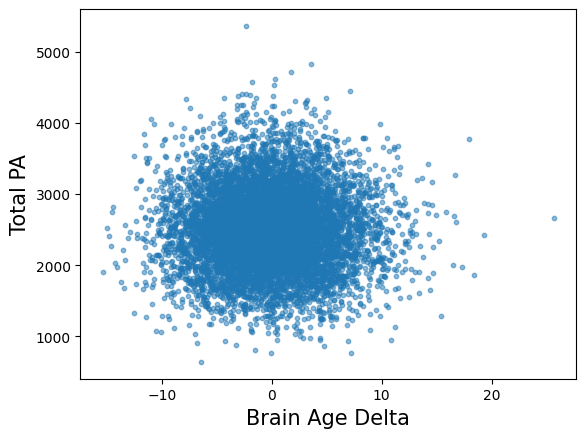

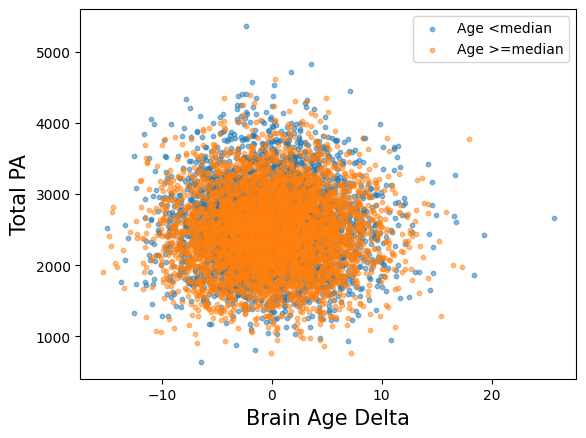

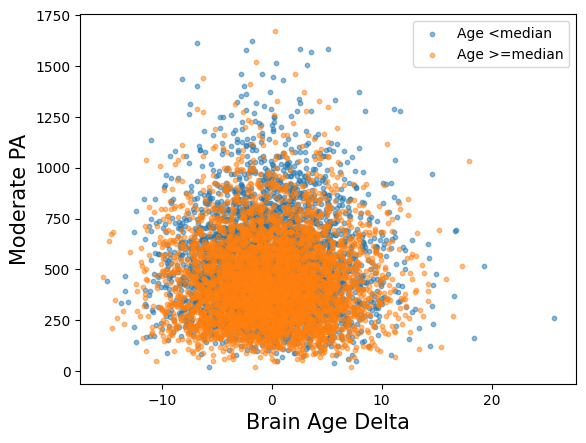

In [9]:
plt.figure()
plt.scatter(main_test["BA Delta Corr"], main_test["Light PA"], alpha=0.5, s=10)
plt.ylabel("Light PA", fontsize = 15)
plt.xlabel("Brain Age Delta", fontsize = 15)
plt.show()

plt.figure()
plt.scatter(main_test["BA Delta Corr"], main_test["Moderate PA"], alpha=0.5,s=10)
plt.ylabel("Moderate PA", fontsize = 15)
plt.xlabel("Brain Age Delta", fontsize = 15)
plt.show()

plt.figure()
plt.scatter(main_test["BA Delta Corr"], main_test["Vigorous PA"], alpha=0.5, s=10)
plt.ylabel("Vigorous PA", fontsize = 15)
plt.xlabel("Brain Age Delta", fontsize = 15)
plt.show()

plt.figure()
plt.scatter(main_test["BA Delta Corr"], main_test["Total PA"], alpha=0.5, s=10)
plt.ylabel("Total PA", fontsize = 15)
plt.xlabel("Brain Age Delta", fontsize = 15)
plt.show()



plt.figure()
plt.scatter(main_test_young["BA Delta Corr"], main_test_young["Total PA"], alpha=0.5, s=10, label="Age <median")
plt.scatter(main_test_old["BA Delta Corr"], main_test_old["Total PA"], alpha=0.5, s=10, label="Age >=median")
plt.ylabel("Total PA", fontsize = 15)
plt.xlabel("Brain Age Delta", fontsize = 15)
plt.legend()
plt.show()

plt.figure()
plt.scatter(main_test_young["BA Delta Corr"], main_test_young["Moderate PA"], alpha=0.5, s=10, label="Age <median")
plt.scatter(main_test_old["BA Delta Corr"], main_test_old["Moderate PA"], alpha=0.5, s=10, label="Age >=median")
plt.ylabel("Moderate PA", fontsize = 15)
plt.xlabel("Brain Age Delta", fontsize = 15)
plt.legend()
plt.show()

In [10]:
del main_test["BA Desikan Delta Corr"]
del main_test["BA A2009 Delta Corr"]
del main_test["BA ASEG Delta Corr"]

## 4.4. Correlation Heatmaps

### 4.4.1. Heatmap all correlations

<AxesSubplot:>

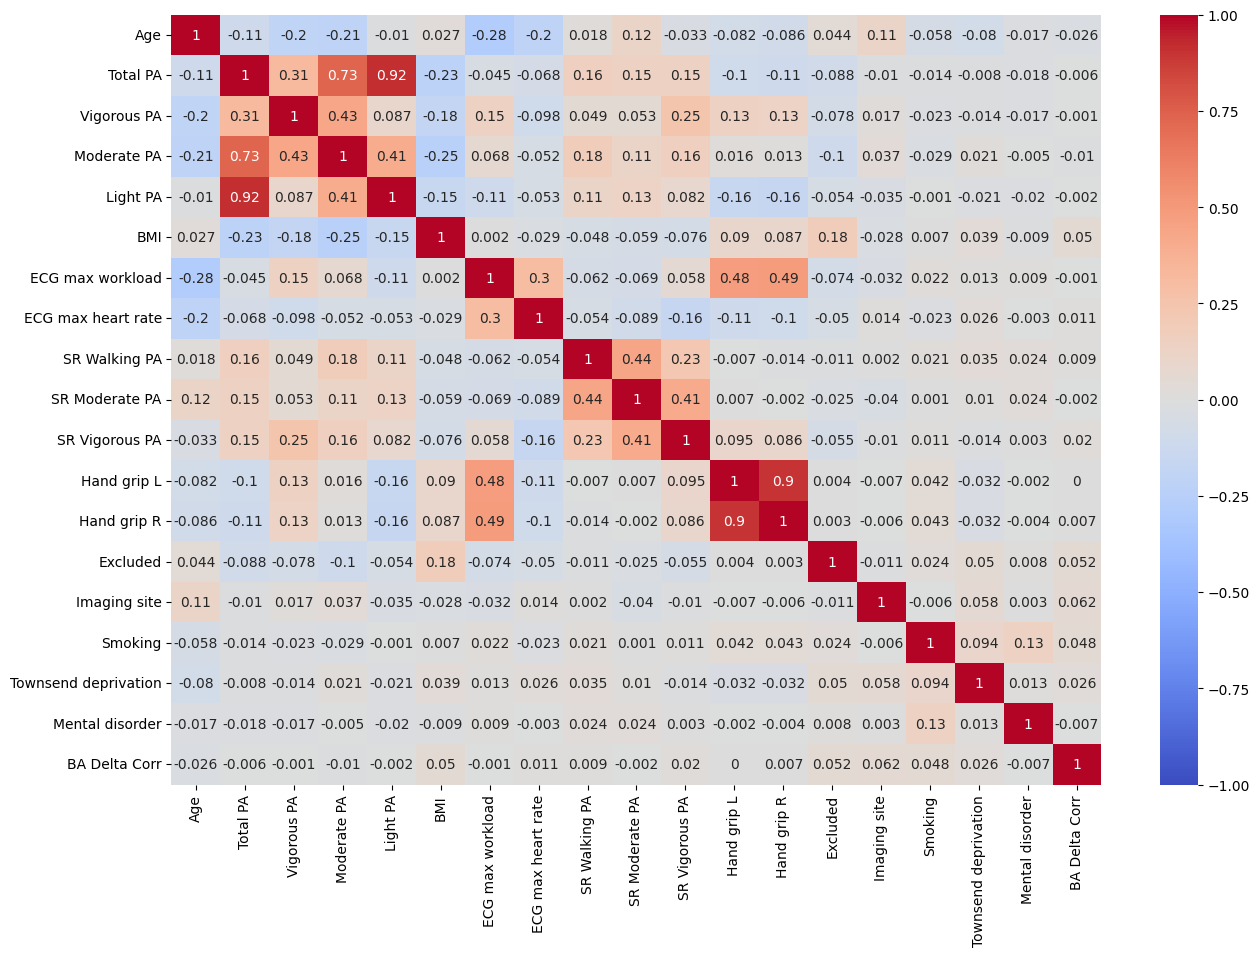

In [11]:
# heat map correlation matrix
# use pcorr to get partial correlations
corr = main_test.corr()
corr = round(corr,3)
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(corr, annot=True, cmap = "coolwarm", vmin=-1, vmax=1)


### 4.4.2. Heatmap all correlations only female

<AxesSubplot:>

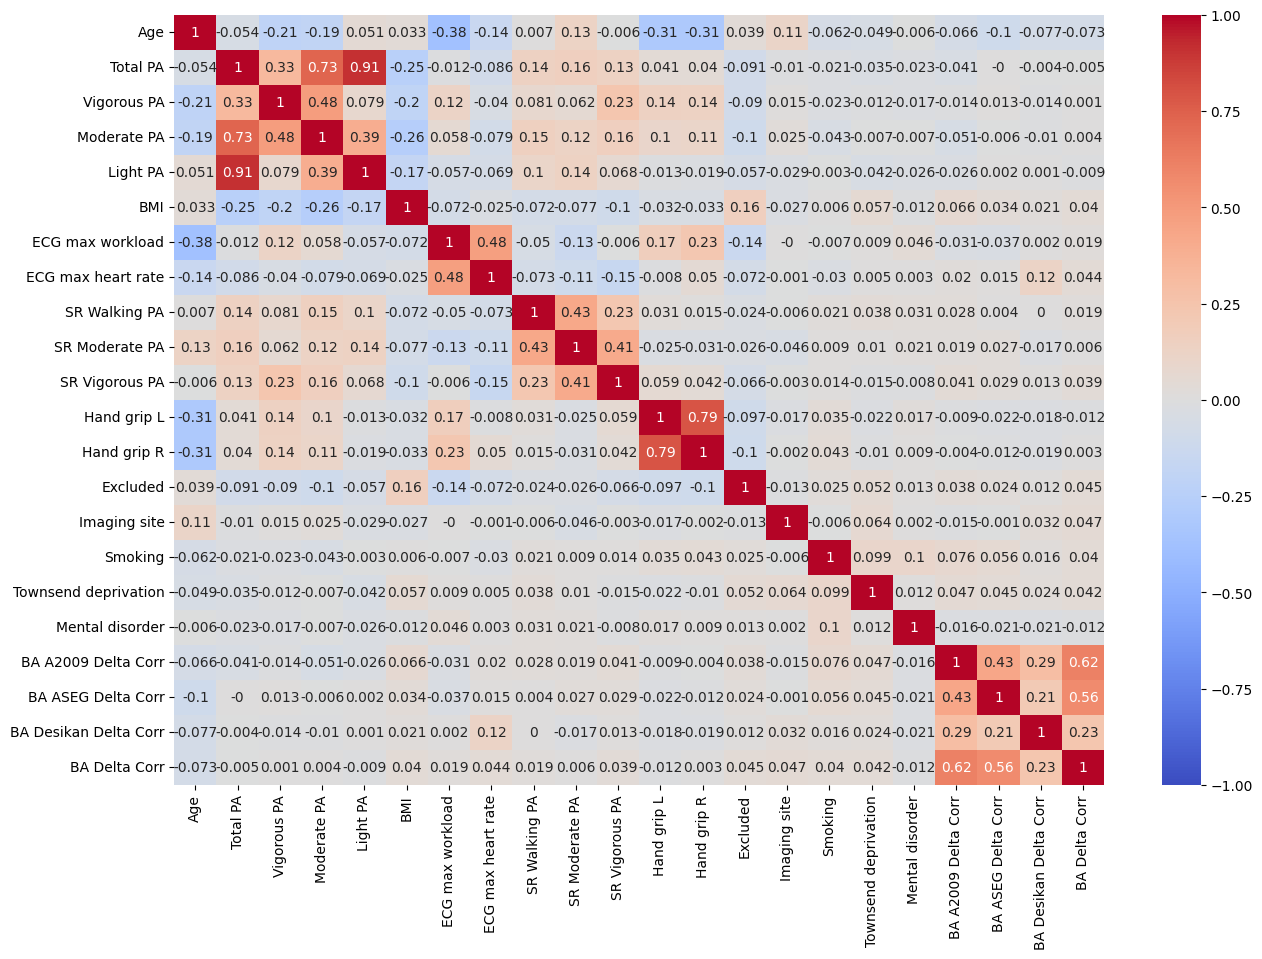

In [12]:
corr = main_test_female.corr()
corr = round(corr,3)
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(corr, annot=True, cmap = "coolwarm", vmin=-1, vmax=1)

### 4.4.3. Heatmap all correlations only male

<AxesSubplot:>

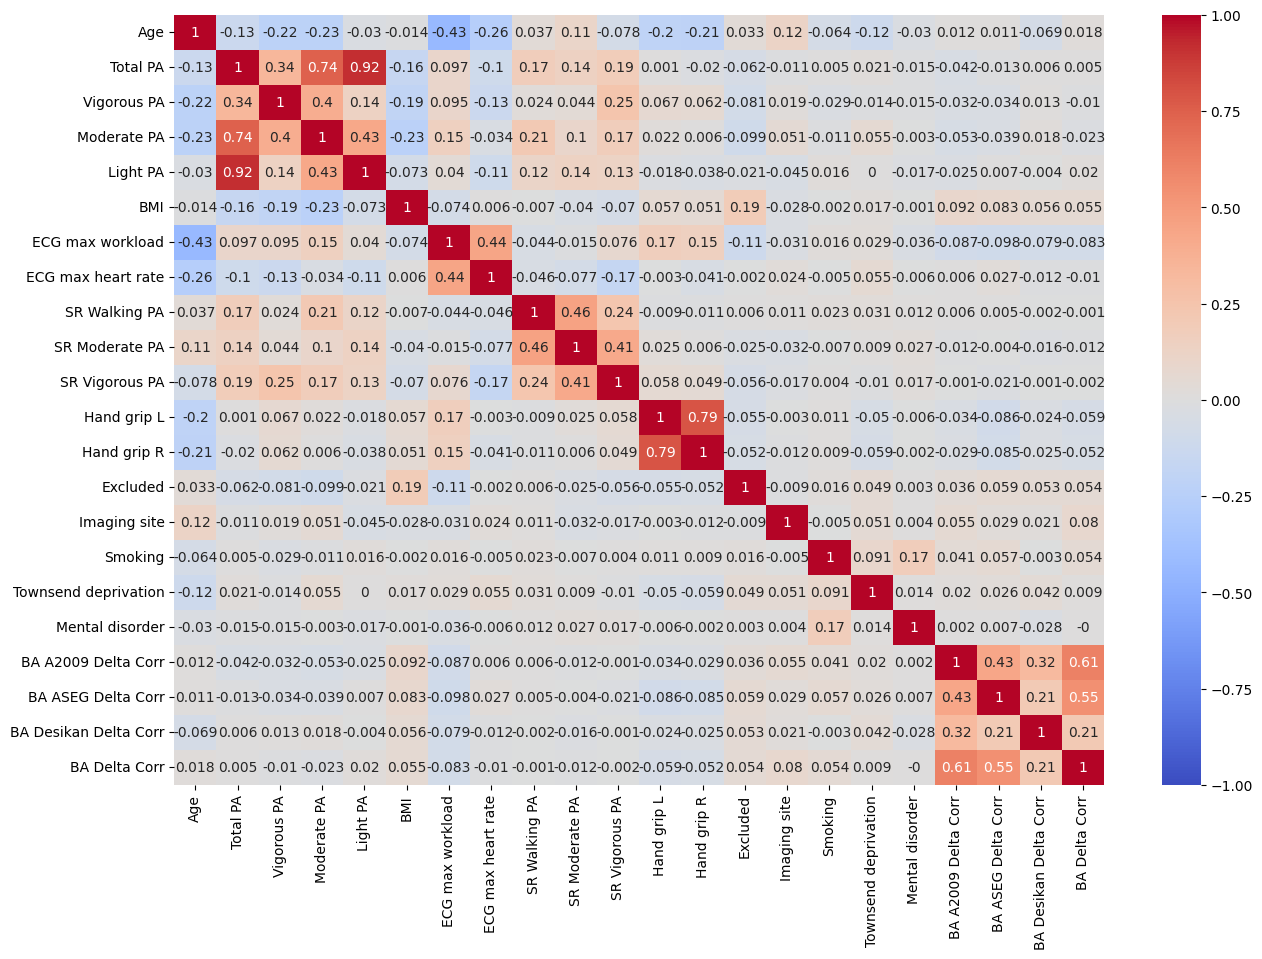

In [13]:
corr = main_test_male.corr()
corr = round(corr,3)
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(corr, annot=True, cmap = "coolwarm", vmin=-1, vmax=1)

### 4.4.4. Heatmap all correlations only older

<AxesSubplot:>

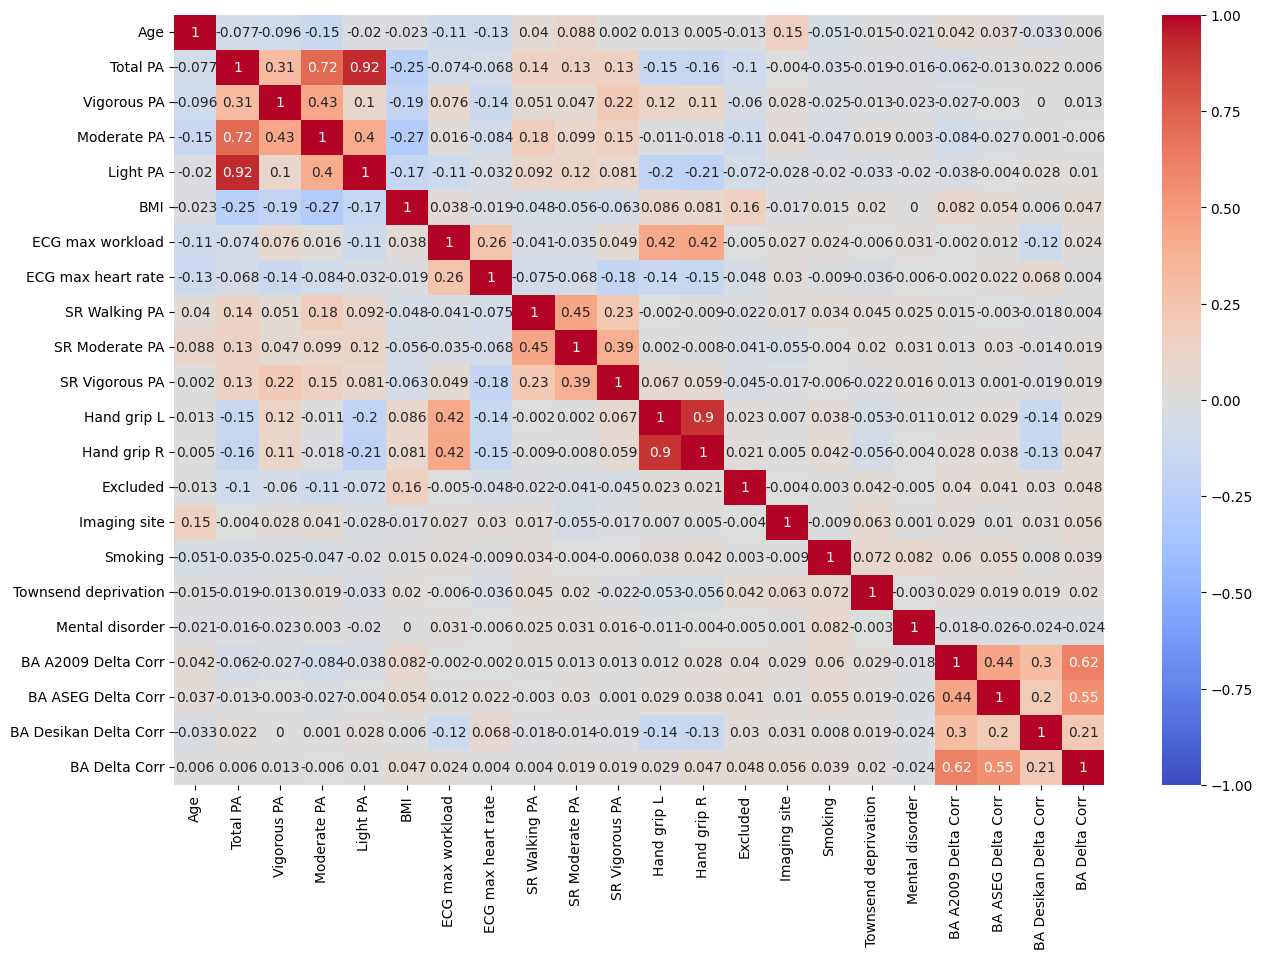

In [14]:
corr = main_test_old.corr()
corr = round(corr,3)
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(corr, annot=True, cmap = "coolwarm", vmin=-1, vmax=1)

### 4.4.5. Heatmap all correlations only young

<AxesSubplot:>

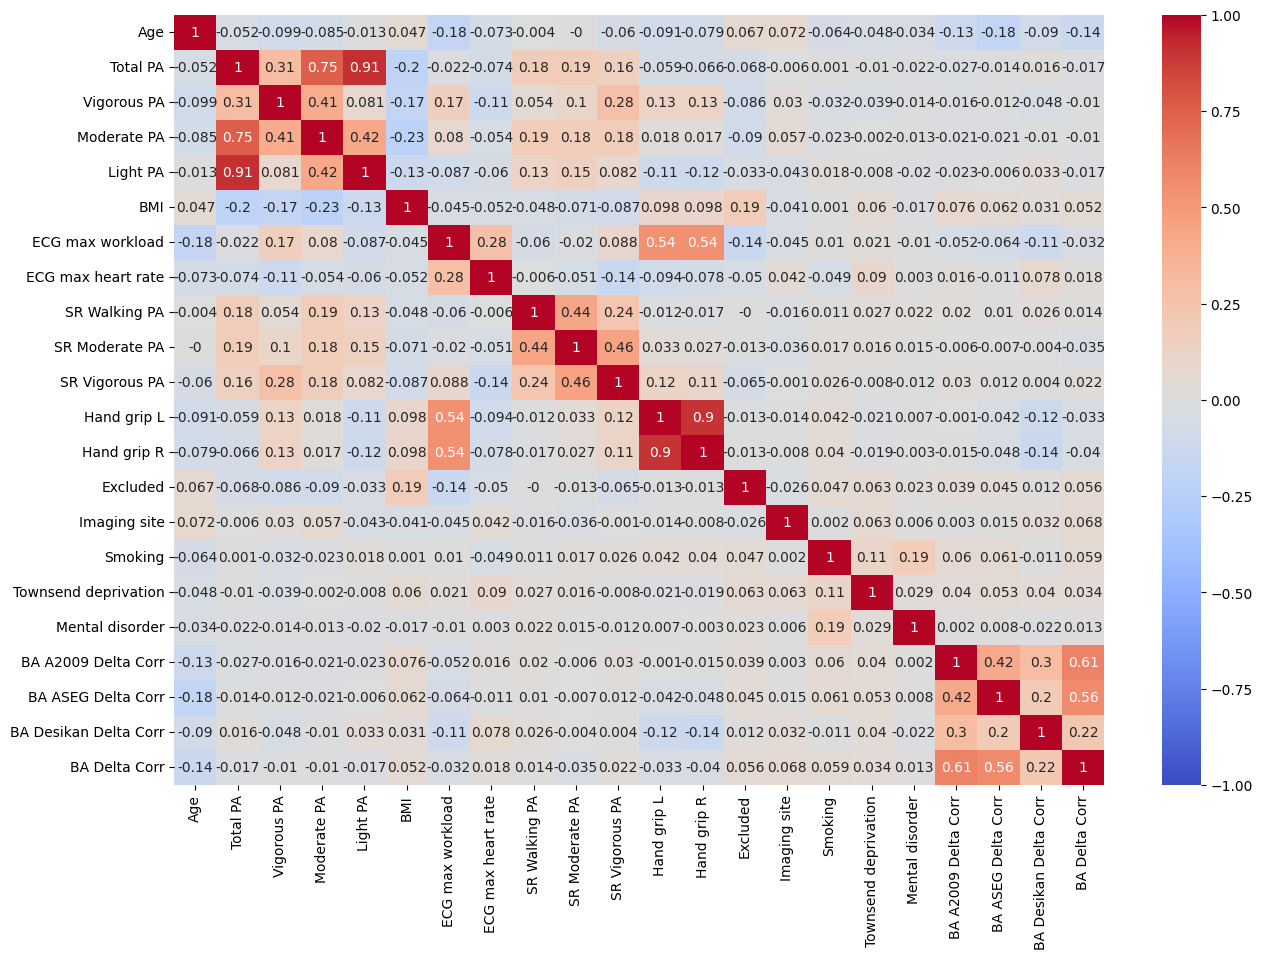

In [15]:
corr = main_test_young.corr()
corr = round(corr,3)
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(corr, annot=True, cmap = "coolwarm", vmin=-1, vmax=1)

# 5. Exploratory models

## 5.1. Partial correlations

In [16]:
cov_correlation = pg.partial_corr(data=main_test, x='Vigorous PA', y='BA Delta Corr', covar='Age')
cov_correlation

,n,r,CI95%,p-val
pearson,8357,-0.006763,"[-0.03, 0.01]",0.536476


In [17]:
cov_correlation = pg.partial_corr(data=main_test_young, x='Vigorous PA', y='BA Delta Corr', covar='Age')
cov_correlation

,n,r,CI95%,p-val
pearson,3921,-0.023845,"[-0.06, 0.01]",0.135521


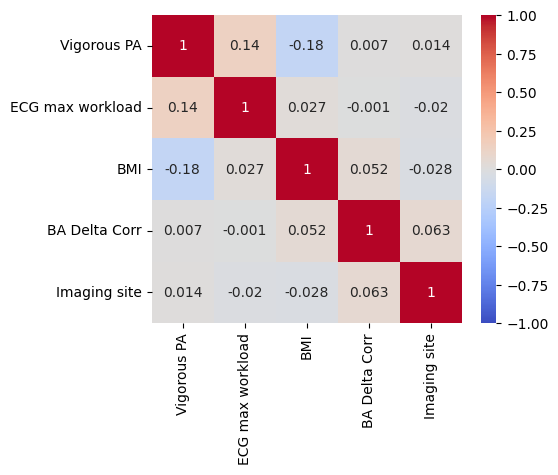

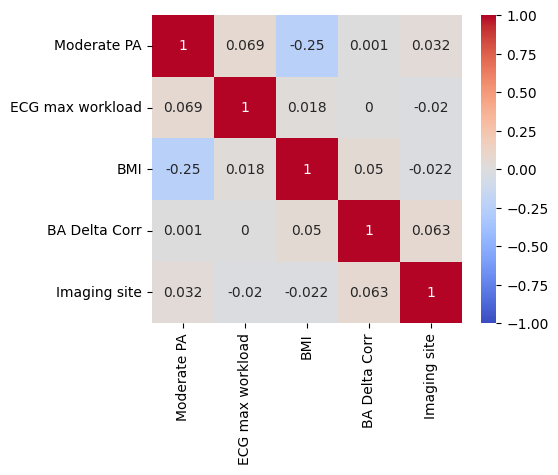

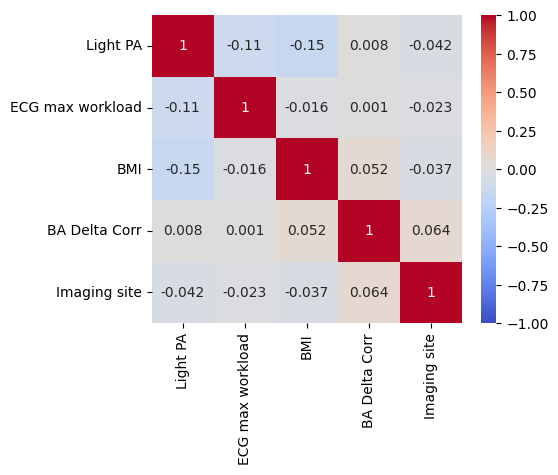

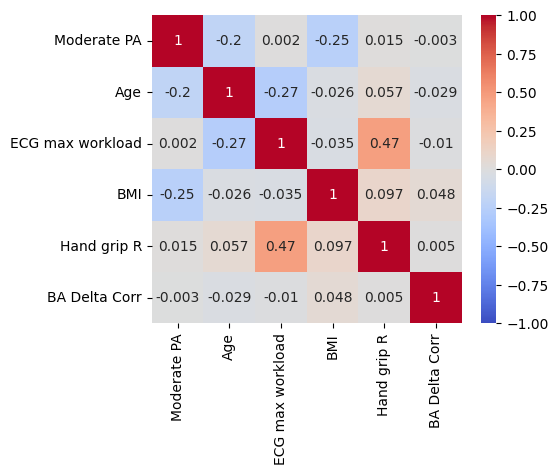

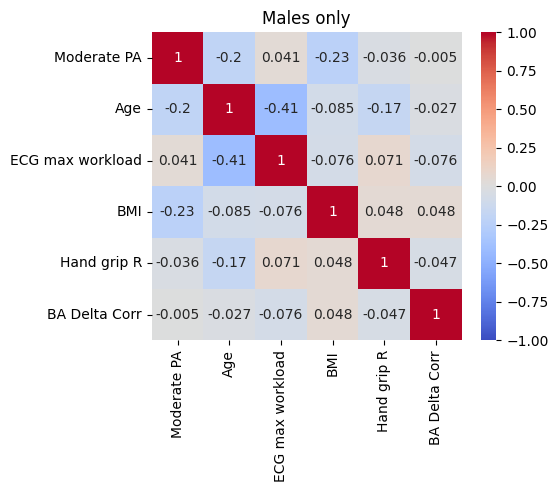

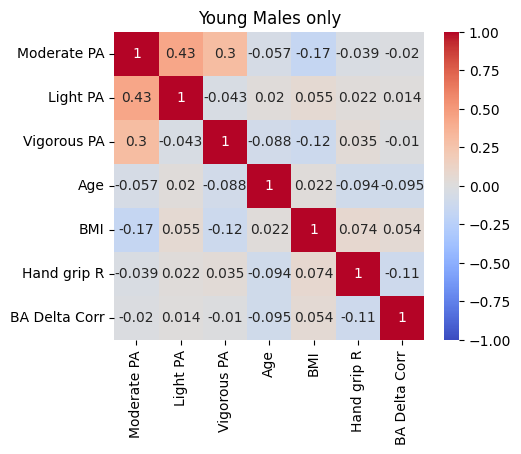

In [18]:

pcorr = main_test[["Vigorous PA", "ECG max workload", "BMI", "BA Delta Corr", "Imaging site"]].pcorr()
pcorr = round(pcorr,3)
plt.figure(figsize=(5,4)) 
sns.heatmap(pcorr, annot=True, cmap = "coolwarm", vmin=-1, vmax=1)
plt.show()

pcorr = main_test[["Moderate PA", "ECG max workload", "BMI", "BA Delta Corr", "Imaging site"]].pcorr()
pcorr = round(pcorr,3)
plt.figure(figsize=(5,4)) 
sns.heatmap(pcorr, annot=True, cmap = "coolwarm", vmin=-1, vmax=1)
plt.show()

pcorr = main_test[["Light PA", "ECG max workload", "BMI", "BA Delta Corr", "Imaging site"]].pcorr()
pcorr = round(pcorr,3)
plt.figure(figsize=(5,4)) 
sns.heatmap(pcorr, annot=True, cmap = "coolwarm", vmin=-1, vmax=1)
plt.show()

pcorr = main_test[["Moderate PA", "Age", "ECG max workload", "BMI", "Hand grip R", "BA Delta Corr"]].pcorr()
pcorr = round(pcorr,3)
plt.figure(figsize=(5,4)) 
sns.heatmap(pcorr, annot=True, cmap = "coolwarm", vmin=-1, vmax=1)
plt.show()

pcorr = main_test_male[["Moderate PA", "Age", "ECG max workload", "BMI", "Hand grip R", "BA Delta Corr"]].pcorr()
pcorr = round(pcorr,3)
plt.figure(figsize=(5,4)) 
sns.heatmap(pcorr, annot=True, cmap = "coolwarm", vmin=-1, vmax=1)
plt.title("Males only")
plt.show()

pcorr = main_test_young_male[["Moderate PA", "Light PA", "Vigorous PA", "Age", "BMI", "Hand grip R", "BA Delta Corr"]].pcorr()
pcorr = round(pcorr,3)
plt.figure(figsize=(5,4)) 
sns.heatmap(pcorr, annot=True, cmap = "coolwarm", vmin=-1, vmax=1)
plt.title("Young Males only")
plt.show()



## 5.2. Multiple linear regression

In [19]:
x = main_test[["Vigorous PA", "Moderate PA", "Light PA","Imaging site"]]
y = main_test["BA Delta Corr"]
model = LassoCV().fit(x, y)
r_sq = model.score(x, y)
print(f"R squared: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

R squared: 0.004021391224763304
intercept: -0.6845995226067714
coefficients: [ 3.95341319e-04 -3.17258158e-04  6.21989261e-05  3.21203016e-01]


In [20]:
dataset = main_test[["Moderate PA", "Age", "ECG max workload", "BMI", "Hand grip R", "BA Delta Corr", "Excluded", "Imaging site"]]
dataset = dataset.dropna(axis=0)
x = dataset[["Moderate PA", "Age", "ECG max workload", "BMI", "Hand grip R","Excluded"]]
y = dataset["BA Delta Corr"]
model = LassoCV().fit(x, y)
r_sq = model.score(x, y)
print(f"R squared: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

R squared: 0.0023907827621636457
intercept: 0.3508581224900892
coefficients: [-0.00095799 -0.          0.          0.          0.          0.        ]


In [21]:
dataset = main_test[["Moderate PA", "Light PA", "Vigorous PA", "Age","Gender", "BMI", "Hand grip R", "BA Delta Corr", "Excluded", "Imaging site", "Mental disorder"]]
dataset = dataset.dropna(axis=0)
x = dataset[["Moderate PA", "Light PA", "Vigorous PA", "Age", "Gender", "BMI", "Hand grip R","Excluded","Imaging site", "Mental disorder"]]
y = dataset["BA Delta Corr"]
model = LassoCV().fit(x, y)
r_sq = model.score(x, y)
print(f"R squared: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

R squared: 0.0123232437201376
intercept: -0.16143089501432617
coefficients: [-2.50829581e-04  1.88937672e-04  3.44409983e-04 -2.82184857e-02
  6.13932919e-01  4.51293802e-02 -1.95550564e-02  3.72197481e-01
  3.61524821e-01 -0.00000000e+00]


In [22]:
dataset = main_test_male[["Moderate PA", "Light PA", "Vigorous PA", "Age","BMI", "Hand grip R", "BA Delta Corr", "Excluded", "Imaging site", "Mental disorder"]]
dataset = dataset.dropna(axis=0)
x = dataset[["Moderate PA", "Light PA", "Vigorous PA", "Age", "BMI", "Hand grip R","Excluded","Imaging site", "Mental disorder"]]
y = dataset["BA Delta Corr"]
model = LassoCV().fit(x, y)
r_sq = model.score(x, y)
print(f"R squared: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

R squared: 0.015902513096201054
intercept: -1.560726978281497
coefficients: [-0.00071791  0.00043975  0.00091483 -0.00252127  0.06196616 -0.02930013
  0.25261089  0.41112969 -0.        ]


In [23]:
dataset = main_test_female[["Moderate PA", "Light PA", "Vigorous PA", "Age","BMI", "Hand grip R", "BA Delta Corr", "Excluded", "Imaging site", "Mental disorder"]]
dataset = dataset.dropna(axis=0)
x = dataset[["Moderate PA", "Light PA", "Vigorous PA", "Age", "BMI", "Hand grip R","Excluded","Imaging site", "Mental disorder"]]
y = dataset["BA Delta Corr"]
model = LassoCV().fit(x, y)
r_sq = model.score(x, y)
print(f"R squared: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

R squared: 0.01231526459243526
intercept: 1.5829143155981509
coefficients: [ 8.75033745e-05  2.71798345e-05 -3.65584864e-04 -4.99214677e-02
  3.74432008e-02 -1.29284628e-02  3.05996203e-01  2.75687787e-01
 -0.00000000e+00]


In [24]:
dataset = main_test_old_female[["Moderate PA", "Light PA", "Vigorous PA", "BMI", "Hand grip R", "BA Delta Corr", "Excluded", "Imaging site", "Mental disorder"]]
dataset = dataset.dropna(axis=0)
x = dataset[["Moderate PA", "Light PA", "Vigorous PA", "BMI", "Hand grip R","Excluded","Imaging site", "Mental disorder"]]
y = dataset["BA Delta Corr"]
model = LassoCV().fit(x, y)
r_sq = model.score(x, y)
print(f"R squared: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

R squared: 0.0
intercept: -0.4130915605650402
coefficients: [ 0.  0. -0.  0.  0.  0.  0. -0.]


In [25]:
dataset = main_test_young_female[["Moderate PA", "Light PA", "Vigorous PA", "BMI", "Hand grip R", "BA Delta Corr", "Excluded", "Imaging site", "Mental disorder"]]
dataset = dataset.dropna(axis=0)
x = dataset[["Moderate PA", "Light PA", "Vigorous PA", "BMI", "Hand grip R","Excluded","Imaging site", "Mental disorder"]]
y = dataset["BA Delta Corr"]
model = LassoCV().fit(x, y)
r_sq = model.score(x, y)
print(f"R squared: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

R squared: 0.0004516654041079038
intercept: -0.0491491398506656
coefficients: [ 0.00000000e+00 -9.17628563e-05  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]


In [26]:
dataset = main_test_old_male[["Moderate PA", "Light PA", "Vigorous PA", "BMI", "Hand grip R", "BA Delta Corr", "Excluded", "Imaging site", "Mental disorder"]]
dataset = dataset.dropna(axis=0)
x = dataset[["Moderate PA", "Light PA", "Vigorous PA", "BMI", "Hand grip R","Excluded","Imaging site", "Mental disorder"]]
y = dataset["BA Delta Corr"]
model = LassoCV().fit(x, y)
r_sq = model.score(x, y)
print(f"R squared: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

R squared: 0.011462102587012968
intercept: -3.0522447981482905
coefficients: [-0.00076339  0.00058263  0.00370044  0.07614369 -0.00624195  0.11163537
  0.29506334 -0.        ]


In [27]:
dataset = main_test_young_male[["Age","Moderate PA", "Light PA", "Vigorous PA", "BMI", "Hand grip R", "BA Delta Corr", "Excluded", "Imaging site", "Mental disorder"]]
dataset = dataset.dropna(axis=0)
x = dataset[["Age","Moderate PA", "Light PA", "Vigorous PA", "BMI", "Hand grip R","Excluded","Imaging site", "Mental disorder"]]
y = dataset["BA Delta Corr"]
model = LassoCV().fit(x, y)
r_sq = model.score(x, y)
print(f"R squared: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

R squared: 0.03258829748873071
intercept: 5.356292293251327
coefficients: [-9.20400263e-02 -6.72471228e-04  2.58266395e-04 -9.87789397e-04
  5.72067518e-02 -5.76884298e-02  0.00000000e+00  4.14929387e-01
  0.00000000e+00]


## 5.3. ANOVAs

In [28]:
#perform three-way ANOVA
# main_test["BA"] = main_test["BA Delta Corr"]
# main_test["HGR"] = main_test["Hand grip R"]
# main_test["VPA"] = main_test["Vigorous PA"]
# model = ols("BA ~ C(VPA) + C(Gender) + C(HGR) + C(VPA):C(Gender) + C(VPA):C(HGR) + C(Gender):C(HGR) + C(VPA):C(Gender):C(HGR)", data=main_test).fit()

# sm.stats.anova_lm(model, typ=2)

In [29]:
#perform three-way ANOVA
# main_test_young["BA"] = main_test_young["BA Delta Corr"]
# main_test_young["HGR"] = main_test_young["Hand grip R"]
# main_test_young["VPA"] = main_test_young["Vigorous PA"]
# model = ols("BA ~ C(VPA) + C(Gender) + C(HGR) + C(VPA):C(Gender) + C(VPA):C(HGR) + C(Gender):C(HGR) + C(VPA):C(Gender):C(HGR)", data=main_test_young).fit()

# sm.stats.anova_lm(model, typ=2)

In [ ]:
# main_test_young_male = main_test_young_male.iloc[0:500,:]
# main_test_young_male.rename(columns = {'BA Delta Corr':'BA', "Hand grip R": "HGR", "Vigorous PA":"VPA"}, inplace = True)
# main_test_young_male = pd.DataFrame(main_test_young_male)
# model = ols("BA ~ C(VPA) + C(HGR) + C(VPA):C(HGR)", data=main_test_young_male).fit()

# sm.stats.anova_lm(model, typ=2)

In [ ]:
#main_test_young_male = main_test_young_male.iloc[0:500,:]
main_test.rename(columns = {'BA Delta Corr':'BA', "Hand grip R": "HGR", "Vigorous PA":"VPA"}, inplace = True)
main_test = pd.DataFrame(main_test)
model = ols("BA ~ C(Smoking) + C(Gender) + C(Smoking):C(Gender)", data=main_test).fit()

sm.stats.anova_lm(model, typ=2)